## Lorenzo Nastri

### lorenzonastri@gmail.com
### https://www.linkedin.com/in/lorenzo-nastri


| Nombre de la Característica  | Tipo    | Descripción                                           |
|-------------------------|---------|-------------------------------------------------------|
| Contenido_de_Nitrógeno  | Int64   | Proporción de contenido de nitrógeno en el suelo.           |
| Contenido_de_Fósforo    | Int64   | Proporción de contenido de fósforo en el suelo.         |
| Contenido_de_Potasio    | Int64   | Proporción de contenido de potasio en el suelo.          |
| Temperatura_C           | Float64 | Temperatura en grados Celsius.                       |
| Humedad_Relativa        | Float64 | Humedad relativa en porcentaje.                      |
| Nivel_de_pH             | Float64 | Nivel de pH del suelo.                                        |
| Precipitacion_mm        | Float64 | Cantidad de precipitación en milímetros.                  |
| Tipo_de_Cultivo         | Object  | Tipo de cultivo recomendado según los parámetros anteriores.  |



El uso de Machine Learning en la agricultura es vital para optimizar rendimientos, mejorar la sostenibilidad y minimizar riesgos. Esto es particularmente relevante en Argentina, donde la agricultura es un pilar económico. Saber qué tipo de cultivo es más adecuado para condiciones específicas de suelo y clima puede tener un impacto significativo en la productividad y la sostenibilidad.


Mi trabajo se dividirá en 2 partes:

## A. Análisis Exploratorio de Datos (EDA)

Con el fin de realizar un EDA exhaustivo del conjunto de datos, consideraré las siguientes preguntas:
- ¿Cómo se distribuyen los valores en cada una de las variables?
- ¿Existen correlaciones entre las diferentes variables de suelo y los tipos de cultivo?
- ¿Cómo varía la recomendación de cultivos según las condiciones de suelo y clima?
- ¿Existen valores atípicos o valores faltantes que deban tratarse?

## B. Machine Learning

En esta sección, implementaré dos modelos de aprendizaje automático para predecir el tipo de cultivo en función de las variables de suelo y clima. Utilizaré una Regresión Logística y un Árbol de Decisiones.

También interpretaré lo que significa la diagonal y las desviaciones de la diagonal y mencionaré qué cultivo es el más confundido por el algoritmo.

___

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [10]:
df_cultivos = pd.read_csv("tipo_cultivo.csv")
df_cultivos.head()

,Unnamed: 0,Contenido_de_Nitrogeno,Contenido_de_Fosforo,Contenido_de_Potasio,Temperatura_C,Humedad_Relativa,Nivel_de_pH,Precipitacion_mm,Tipo_de_Cultivo
0,0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [11]:
df_cultivos = df_cultivos.copy()

In [12]:
df_cultivos.columns

Index(['Unnamed: 0', 'Contenido_de_Nitrogeno', 'Contenido_de_Fosforo',
       'Contenido_de_Potasio', 'Temperatura_C', 'Humedad_Relativa',
       'Nivel_de_pH', 'Precipitacion_mm', 'Tipo_de_Cultivo'],
      dtype='object')

## A. Exploratory Data Analysis (EDA)

### Validación de datos

Procedo a eliminar espacios de las columnas.

In [13]:
df_cultivos.rename(columns=lambda x: x.strip(), inplace=True)

### Lectura de dataset y dimensión

In [14]:
print("El dataset tiene " + str(df_cultivos.shape[0])+ " filas.")
print("El dataset tiene " + str(df_cultivos.shape[1])+ " columnas.")

El dataset tiene 2200 filas.
El dataset tiene 9 columnas.


In [15]:
df_cultivos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              2200 non-null   int64  
 1   Contenido_de_Nitrogeno  2200 non-null   int64  
 2   Contenido_de_Fosforo    2200 non-null   int64  
 3   Contenido_de_Potasio    2200 non-null   int64  
 4   Temperatura_C           2200 non-null   float64
 5   Humedad_Relativa        2200 non-null   float64
 6   Nivel_de_pH             2200 non-null   float64
 7   Precipitacion_mm        2200 non-null   float64
 8   Tipo_de_Cultivo         2200 non-null   object 
dtypes: float64(4), int64(4), object(1)
memory usage: 154.8+ KB


In [16]:
from exploratory_data_analysis import validate_columns 
validate_columns(df_cultivos)

,Unique_Values,Num_Unique_Values,Num_Null_Values,%_Null_Values,Sample_Unique_Values
Unnamed: 0,NaN,2200.0,0,0.0,"[380, 1173, 2117, 1247, 1344]"
Contenido_de_Nitrogeno,NaN,2200.0,0,0.0,"[32, 9, 104, 39, 103]"
Contenido_de_Fosforo,NaN,2200.0,0,0.0,"[79, 38, 20, 139, 16]"
Contenido_de_Potasio,NaN,2200.0,0,0.0,"[15, 25, 26, 201, 49]"
Temperatura_C,NaN,2200.0,0,0.0,"[23.90910104, 34.58561471, 27.22783677, 41.186..."
Humedad_Relativa,NaN,2200.0,0,0.0,"[20.74619325, 50.34035336, 52.95261751, 81.017..."
Nivel_de_pH,NaN,2200.0,0,0.0,"[5.706198621, 5.497946899, 7.493191968, 5.5399..."
Precipitacion_mm,NaN,2200.0,0,0.0,"[81.60211243, 100.3060719, 175.7260273, 68.688..."
Tipo_de_Cultivo,22,2200,0,0.0,"[kidneybeans, mango, coffee, grapes, watermelon]"


In [17]:
df_cultivos.describe()

,Unnamed: 0,Contenido_de_Nitrogeno,Contenido_de_Fosforo,Contenido_de_Potasio,Temperatura_C,Humedad_Relativa,Nivel_de_pH,Precipitacion_mm
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,1099.500000,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,635.229617,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,549.750000,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,1099.500000,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,1649.250000,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,2199.000000,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


### Tratamiento de outliers

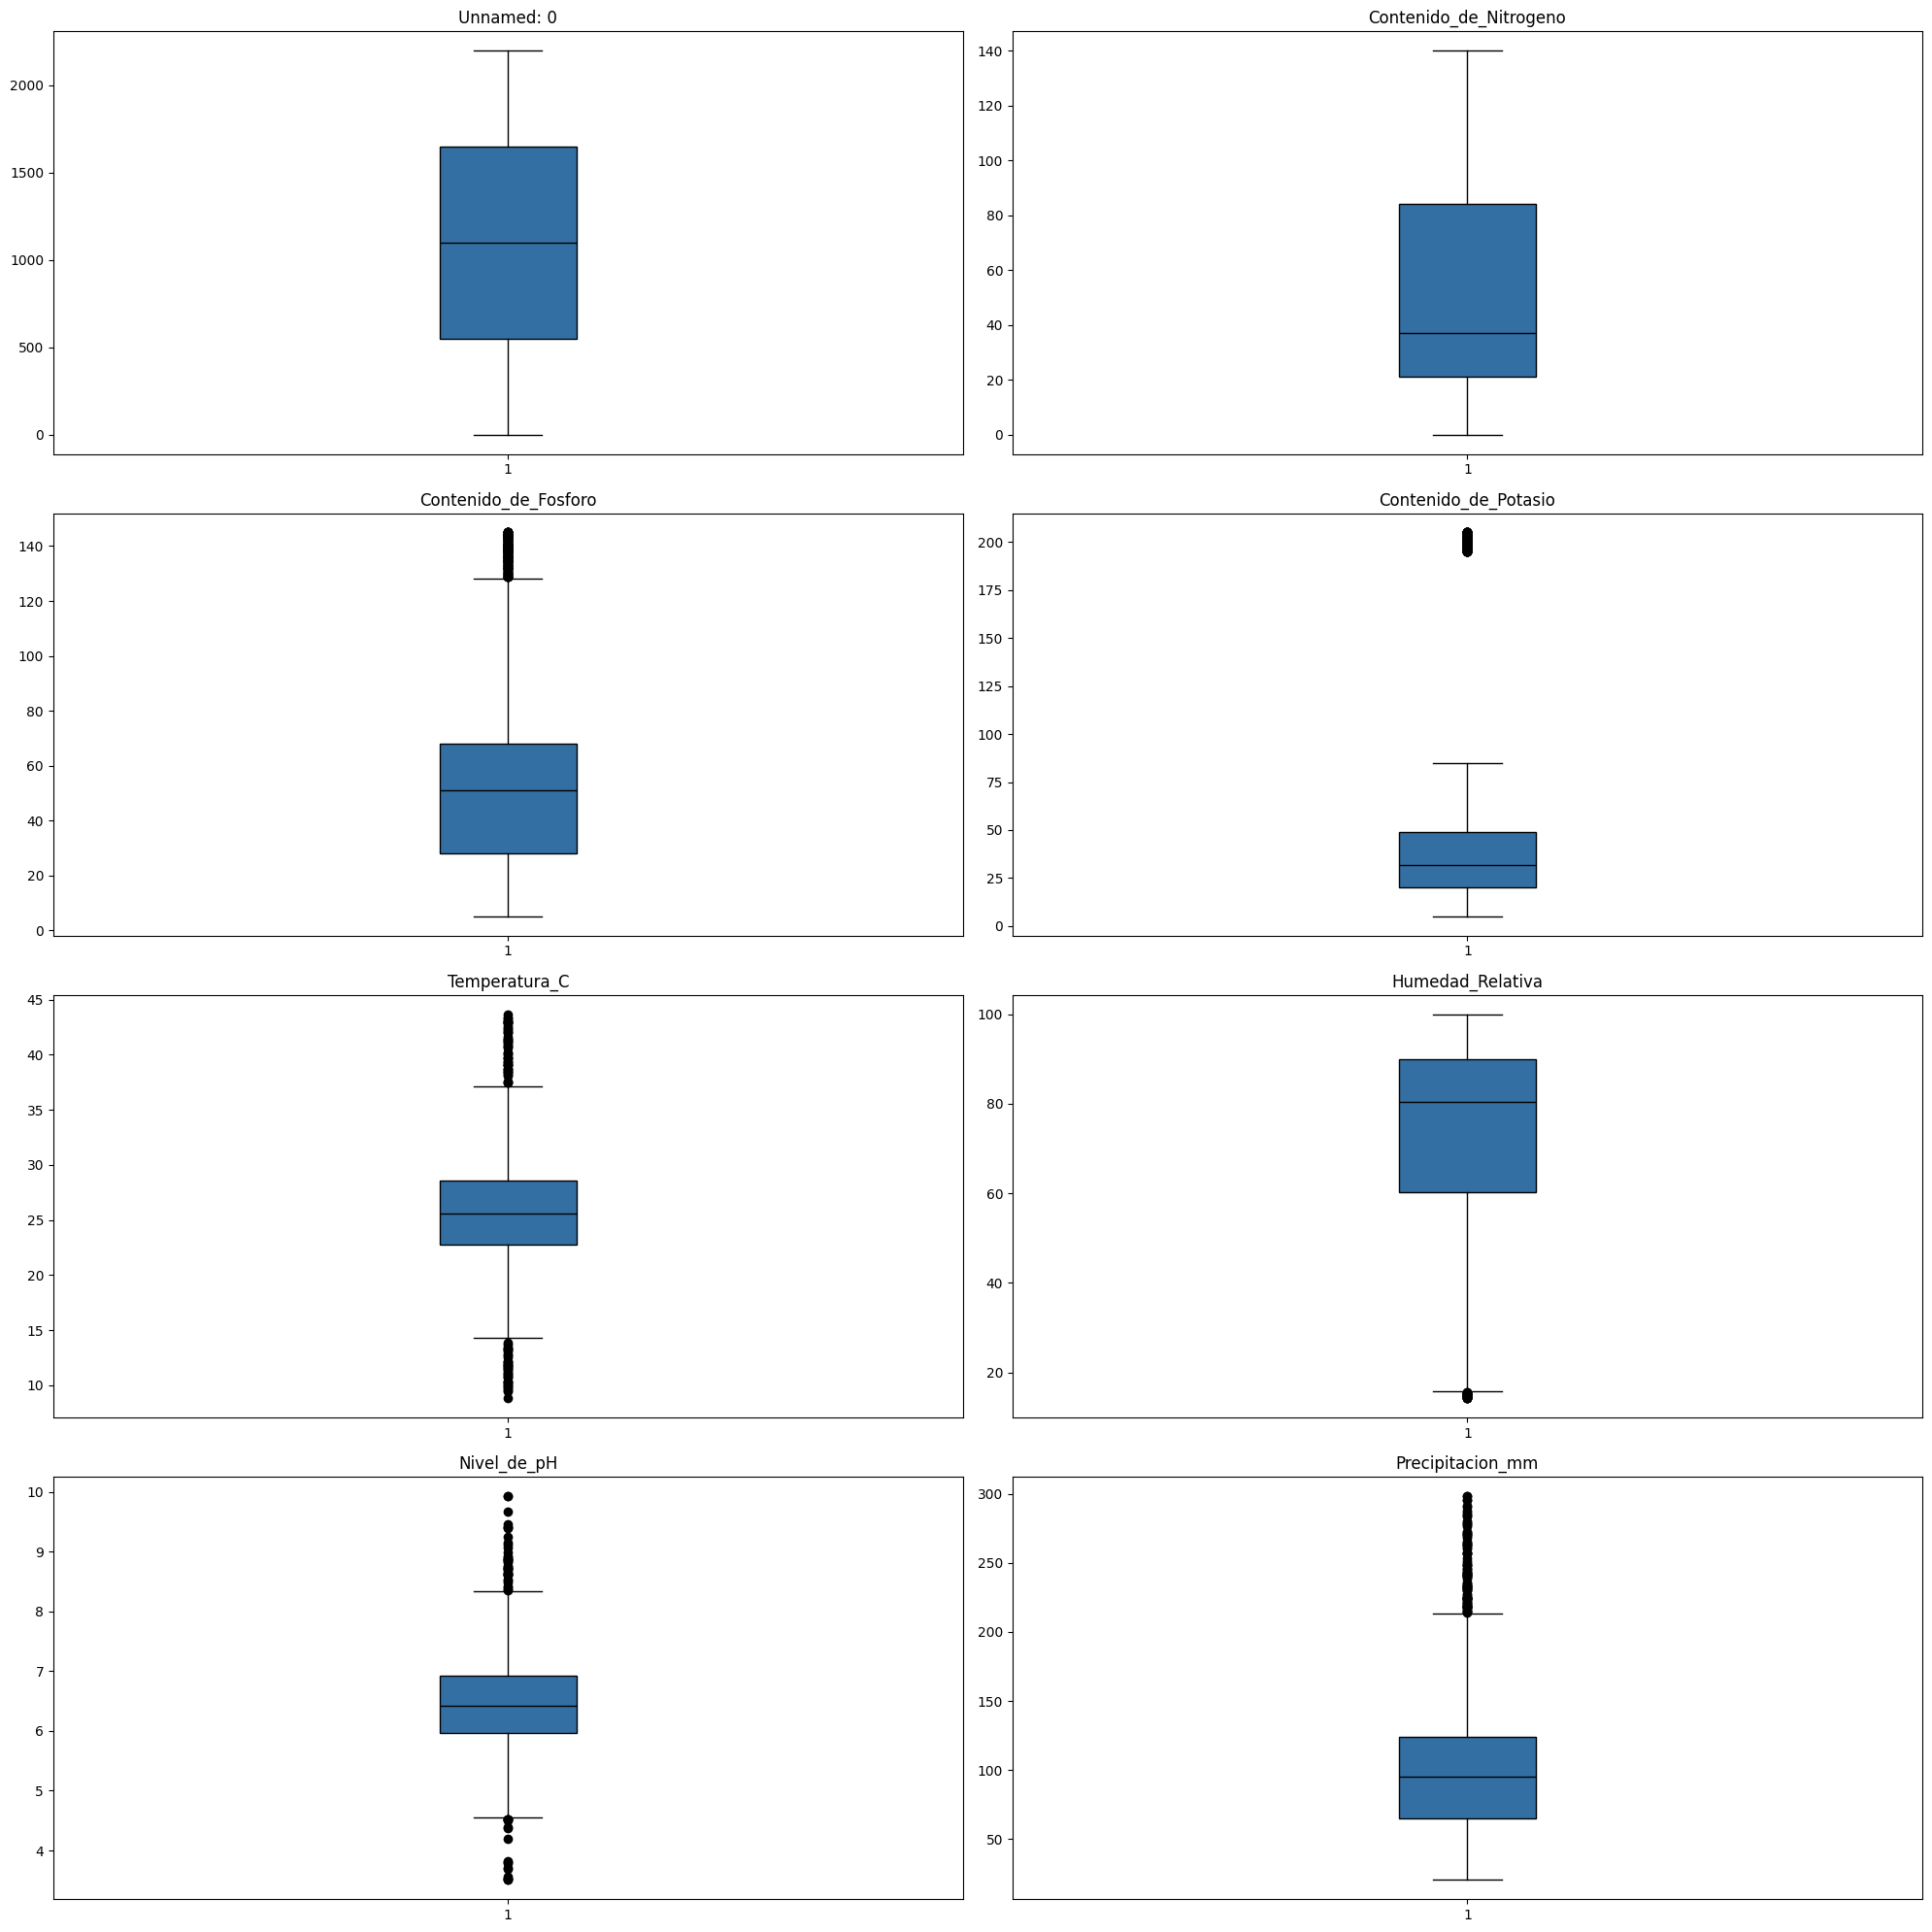

In [18]:
from exploratory_data_analysis import plot_outliers
plot_outliers(df_cultivos)

Podemos concluir que, en este caso, no es necesario realizar un tratamiento específico de outliers en el dataset de cultivos, ya que los valores extremos pueden ser explicados por las variaciones naturales en las condiciones del suelo y del clima. Además las variables pueden ir cambiando en el tiempo y en base al cultivo que se este realizando.

In [19]:
df_cultivos.groupby("Tipo_de_Cultivo").agg({
    "Contenido_de_Fosforo": "mean",
    "Contenido_de_Potasio": "mean",
    "Temperatura_C": "mean"
}).sort_values(by="Contenido_de_Fosforo", ascending=False).reset_index()

,Tipo_de_Cultivo,Contenido_de_Fosforo,Contenido_de_Potasio,Temperatura_C
0,apple,134.22,199.89,22.630942
1,grapes,132.53,200.11,23.849575
2,banana,82.01,50.05,27.376798
3,lentil,68.36,19.41,24.509052
4,chickpea,67.79,79.92,18.872847
5,pigeonpeas,67.73,20.29,27.741762
6,kidneybeans,67.54,20.05,20.115085
7,blackgram,67.47,19.24,29.973340
8,papaya,59.05,50.04,33.723859
9,maize,48.44,19.79,22.389204


### Correlaciones entre las variables del suelo y los tipos de cultivos

Para poder entender las relaciones entre las diferentes variables, se utiliza OneHotEncoder para transformar las variables categóricas en numéricas.

In [20]:
from sklearn.preprocessing import OneHotEncoder
df_cultivos_ohe = OneHotEncoder(sparse=False)
df_cultivos_ohe.fit(df_cultivos[['Tipo_de_Cultivo']])
df_cultivos_ohe.categories_

[array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
        'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
        'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
        'pigeonpeas', 'pomegranate', 'rice', 'watermelon'], dtype=object)]

In [21]:
df_cultivos["apple"], df_cultivos["banana"], df_cultivos["blackgram"], df_cultivos["chickpea"], df_cultivos["coconut"], df_cultivos["coffee"], df_cultivos["cotton"], df_cultivos["grapes"], df_cultivos["jute"], df_cultivos["kidneybeans"], df_cultivos["lentil"], df_cultivos["maize"], df_cultivos["mango"], df_cultivos["mothbeans"], df_cultivos["mungbean"], df_cultivos["muskmelon"], df_cultivos["orange"], df_cultivos["papaya"], df_cultivos["pigeonpeas"], df_cultivos["pomegranate"], df_cultivos["rice"], df_cultivos["watermelon"] = df_cultivos_ohe.transform(df_cultivos[['Tipo_de_Cultivo']]).T

df_cultivos.head()

,Unnamed: 0,Contenido_de_Nitrogeno,Contenido_de_Fosforo,Contenido_de_Potasio,Temperatura_C,Humedad_Relativa,Nivel_de_pH,Precipitacion_mm,Tipo_de_Cultivo,apple,...,mango,mothbeans,mungbean,muskmelon,orange,papaya,pigeonpeas,pomegranate,rice,watermelon
0,0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [22]:
df_cultivos.drop(columns=["Tipo_de_Cultivo"], inplace=True)
df_cultivos.drop(columns=["Unnamed: 0"], inplace=True)

### Correlaciones

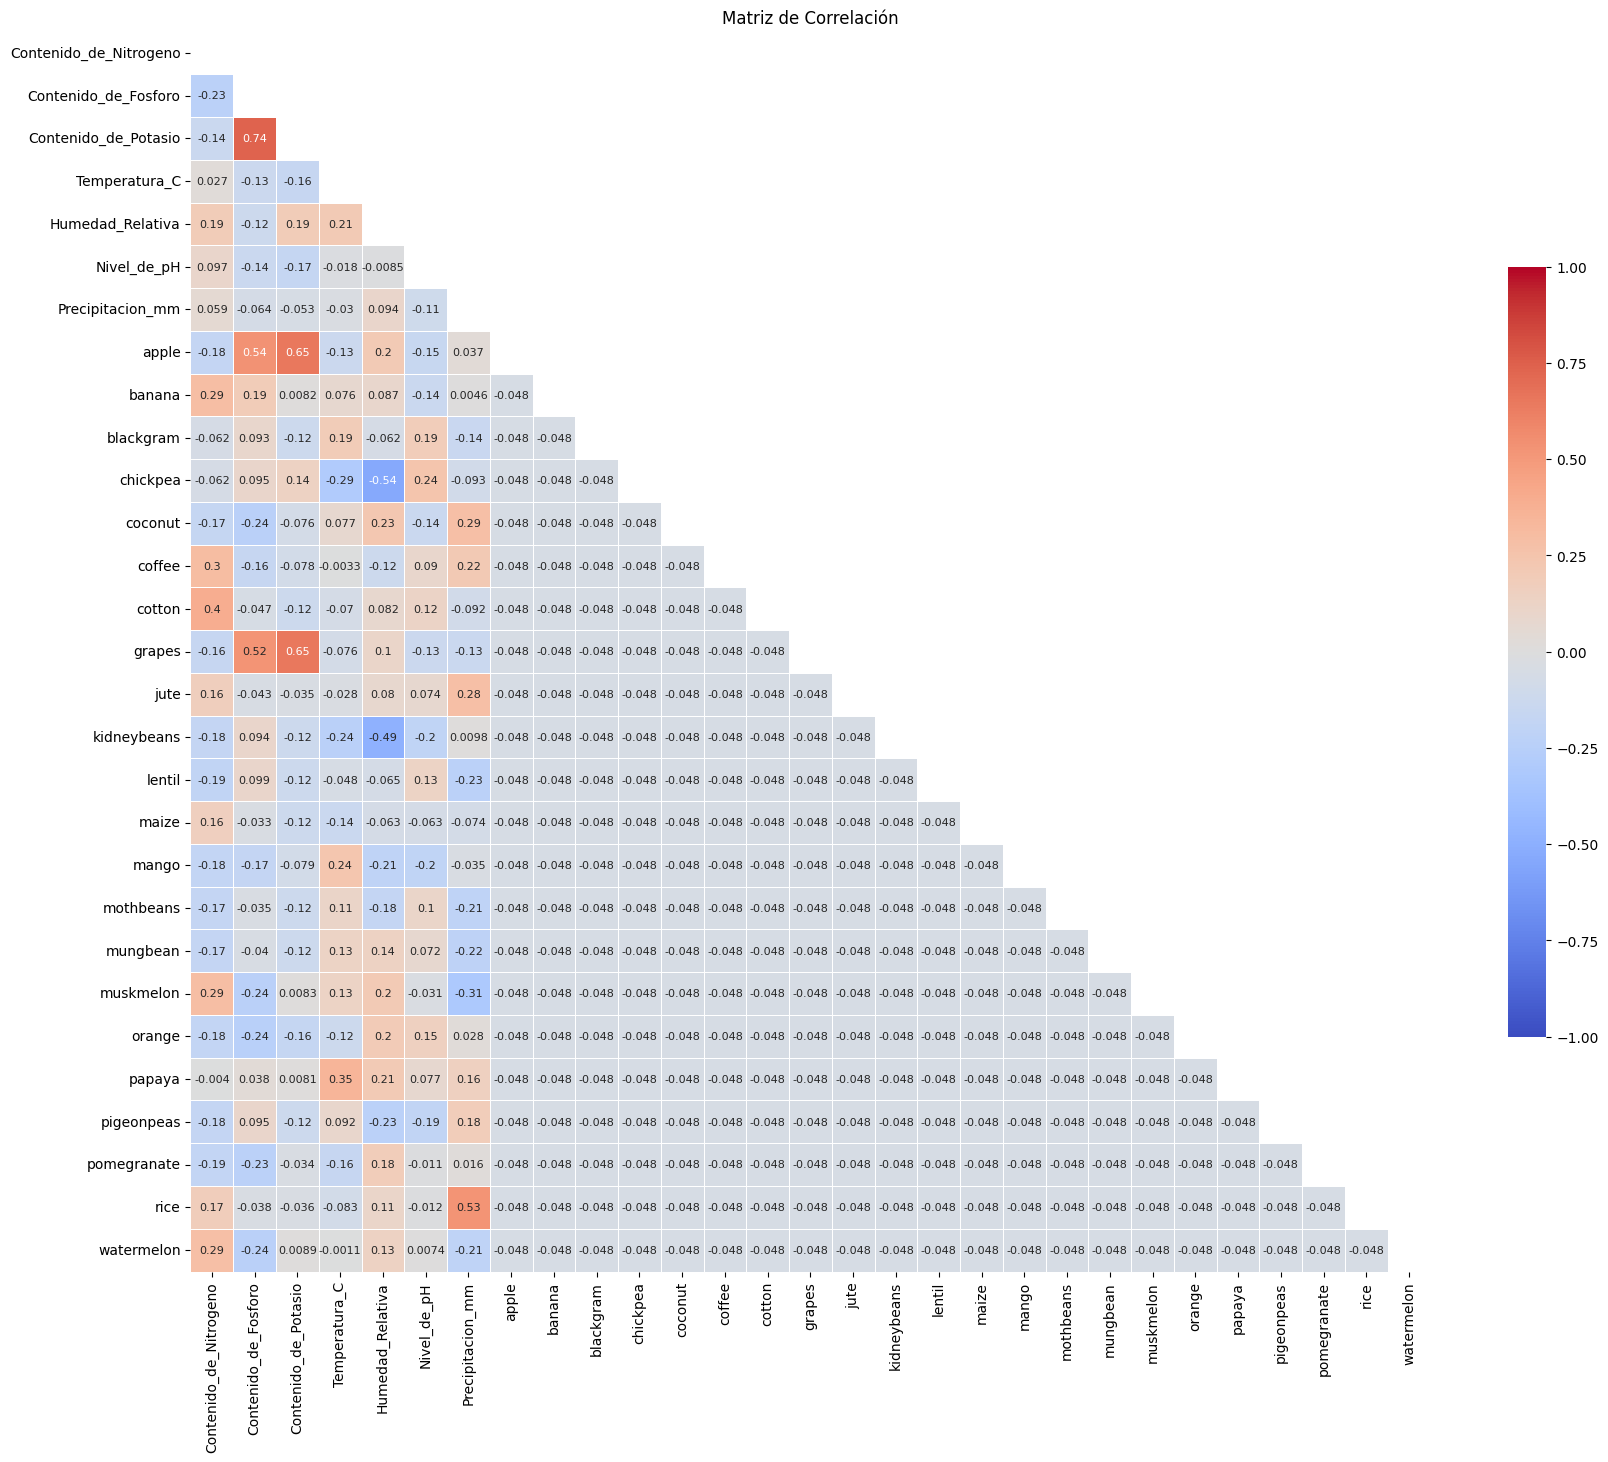

In [23]:
correlation_matrix = df_cultivos.corr()
plt.figure(figsize=(20, 20))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', vmax=1, vmin=-1,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws={"size": 8})
plt.title('Matriz de Correlación')
plt.show()

Cada variable de suelo y clima será analizada en función del tipo de cultivo; solo se considerarán cultivos representativos, aquellos con una correlación superior a 0.2 para cada variable/cultivo.

##### ***Contenido de Nitrógeno***
- "banana" tiene una correlación moderada de 0.29 con "Contenido de Nitrógeno."
- "coffee" tiene una correlación moderada de 0.3 con "Contenido de Nitrógeno."
- "cotton" tiene una correlación moderada de 0.4 con "Contenido de Nitrógeno."
- "muskmelon" y "watermelon" tienen una correlación moderada de 0.29 con "Contenido de Nitrógeno."

##### ***Contenido de Fósforo***
- "grapes" tiene una fuerte correlación de 0.52 con "Contenido de Fósforo."
- "apples" tiene una fuerte correlación de 0.54 con "Contenido de Fósforo."

##### ***Contenido de Potasio***
- "grapes" tiene una fuerte correlación de 0.65 con "Contenido de Potasio."
- "apples" tiene una fuerte correlación de 0.65 con "Contenido de Potasio."

##### ***Temperatura_C***
- "mango" tiene una correlación moderada de 0.24 con "Temperatura_C."
- "papaya" tiene una correlación moderada de 0.35 con "Temperatura_C."

##### ***Humedad Relativa***
- "coconut" tiene una correlación moderada de 0.23 con "Humedad Relativa."
- "muskmelon" y "orange" tienen una correlación moderada de 0.2 con "Humedad Relativa."
- "_papaya" tiene una correlación moderada de 0.21 con "Humedad Relativa."
- "apple" tiene una correlación moderada de 0.2 con "Humedad Relativa."

##### ***Nivel de pH***
- "chickpea" tiene una correlación moderada de 0.24 con "Nivel de pH."

##### ***Precipitación_mm***
- "coconut" tiene una correlación moderada de 0.29 con "Precipitación_mm."
- "coffee" tiene una correlación moderada de 0.22 con "Precipitación_mm."
- "jute" tiene una correlación moderada de 0.28 con "Precipitación_mm."
- "rice" tiene una correlación moderada de 0.53 con "Precipitación_mm."

Es importante destacar que la correlación no implica causalidad; es decir, solo porque dos variables estén correlacionadas no significa que una variable cause la otra. Por lo tanto, se necesita un análisis más detallado para determinar las relaciones causales entre las variables.

### Recomentación de cultivo según las condiciones de suelo y clima

##### Según las condiciones del suelo:

In [24]:
cultivos = ['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
            'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
            'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
            'pigeonpeas', 'pomegranate', 'rice', 'watermelon']

df_cultivos['Tipo_de_Cultivo'] = df_cultivos[cultivos].idxmax(axis=1)

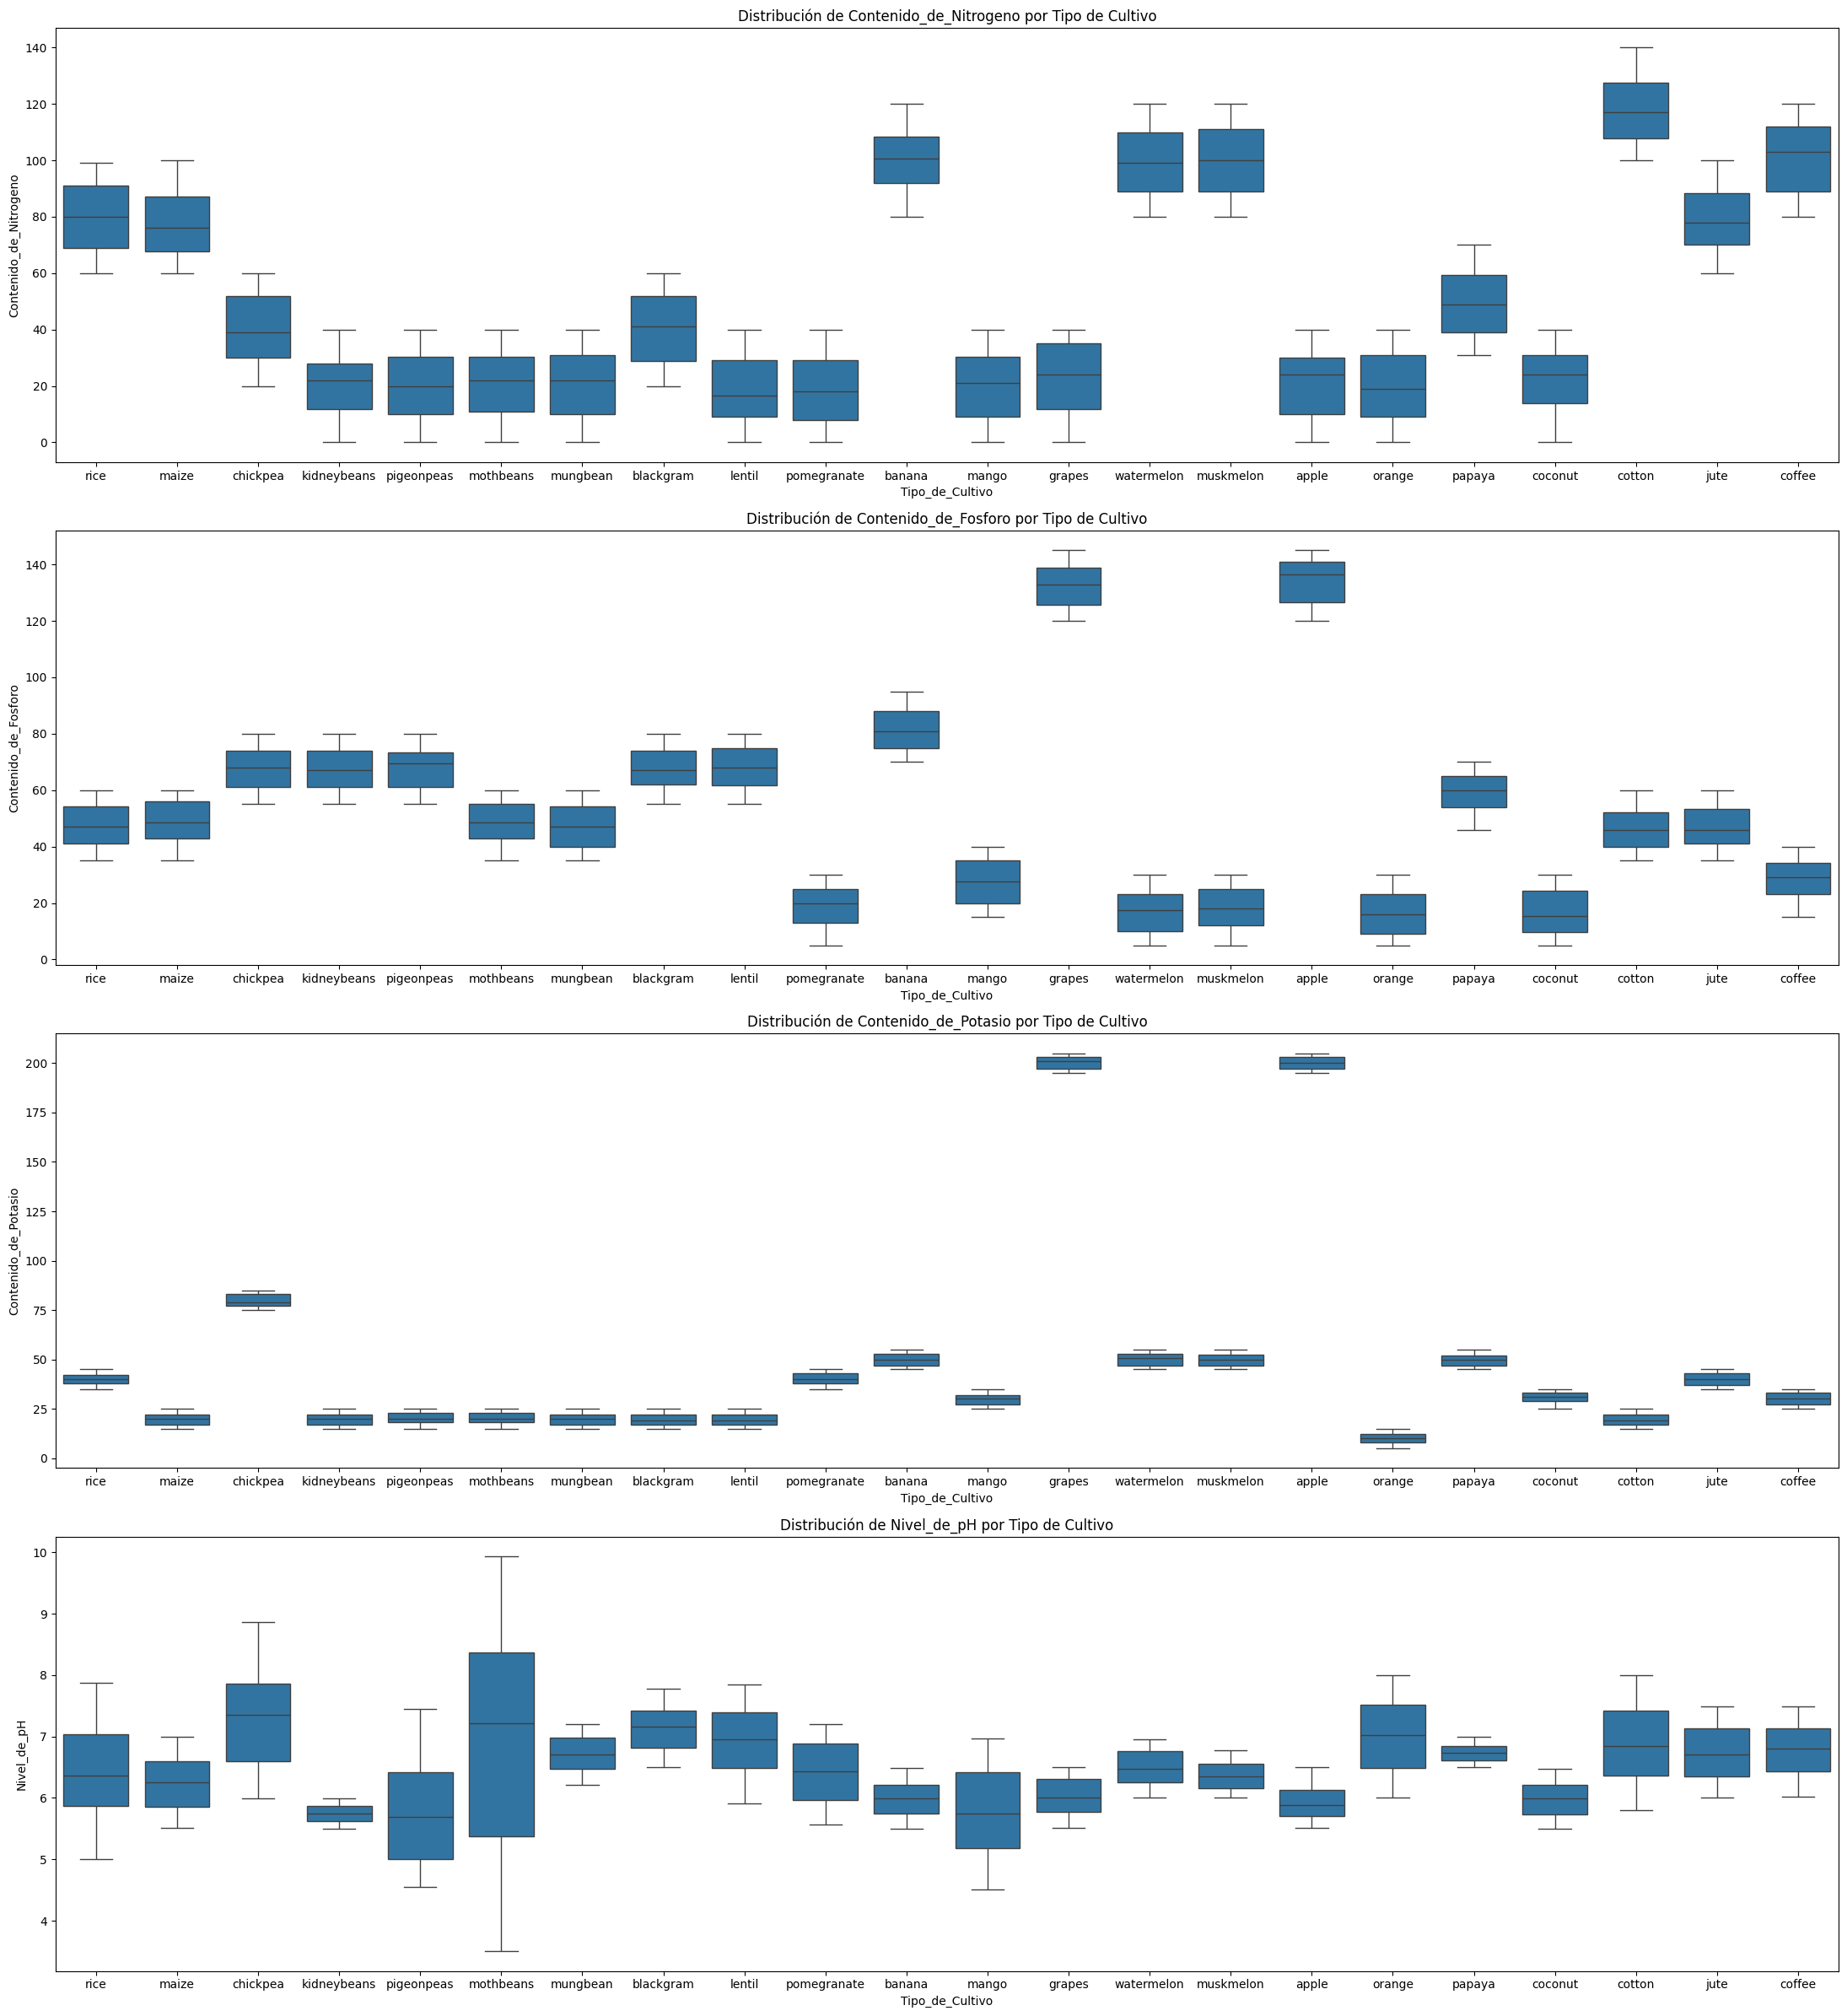

In [25]:
suelo_variables = ['Contenido_de_Nitrogeno', 'Contenido_de_Fosforo', 'Contenido_de_Potasio', 'Nivel_de_pH']

plt.figure(figsize=(22, 24))
for i, variable in enumerate(suelo_variables, 1):
    plt.subplot(4, 1, i)
    sns.boxplot(x='Tipo_de_Cultivo', y=variable, data=df_cultivos)
    plt.title(f'Distribución de {variable} por Tipo de Cultivo')

plt.tight_layout()
plt.show()

##### ***Variación por Contenido de Nitrogeno***
- "cotton" es el tipo de cultivo que requiere de más contenido de nitrógeno. Esto se debe a que el algodón es una planta que requiere de mucho nitrógeno para su crecimiento y desarrollo, ya que es un componente esencial de las proteínas, las cuales son necesarias para la formación de las células vegetales.

##### ***Variación por Contenido de Fosforo***
- "grapes" y "apples" son los tipos de cultivo que requieren de más contenido de fósforo. Esto se debe a que el fósforo es un nutriente esencial para el crecimiento de las plantas, ya que es un componente de los ácidos nucleicos, los fosfolípidos y la molécula de energía ATP.

##### ***Variación por Contenido de Potasio***
- "grapes" y "apples" son los tipos de cultivo que requieren de más contenido de potasio. Esto se debe a que el potasio es un nutriente esencial, al igual que el fosforo, para el crecimiento de las plantas, ya que es un componente de los ácidos nucleicos, los fosfolípidos y la molécula de energía ATP.    

##### ***Variación por Nivel de pH***
- "chickpea" es el tipo de cultivo que requiere de más nivel de pH. Esto se debe a que el garbanzo es una planta que requiere de un pH entre 6 y 7 para su crecimiento y desarrollo.


## ***Recomendación general***
Si se tuviese que realizar una recomendación de cultivo en base a las condiciones del suelo, se realizaría la siguiente recomendación:

- Claramente si se observa el Contenido de Potasio, resulta ser la variable de suelo que mejor clasifica los tipos de cultivo. Hay 2 tipos de cultivos que se destacan por sobre el resto, que son "grapes" y "apples". 

- Si se observa el Contenido de Fosforo, resulta ser la segunda variable de suelo que mejor clasifica los tipos de cultivo. Siguen estando los mismos dos cultivos que se destacan por sobre el resto, que son "grapes" y "apples".

- Si se pone foco en Contenido de Nitrogeno, podemos decir que tiene un comportamiento similar a la variable anterior, pero en este caso es de un menor nivel de calidad para distinguir recomendaciones para los distintos tipos de cultivos.

- Si se observa el Nivel de pH, resulta ser la variable de suelo que peor clasifica los tipos de cultivo. No permite realizar distinciones entre los mismos.

##### Según condiciones del clima:

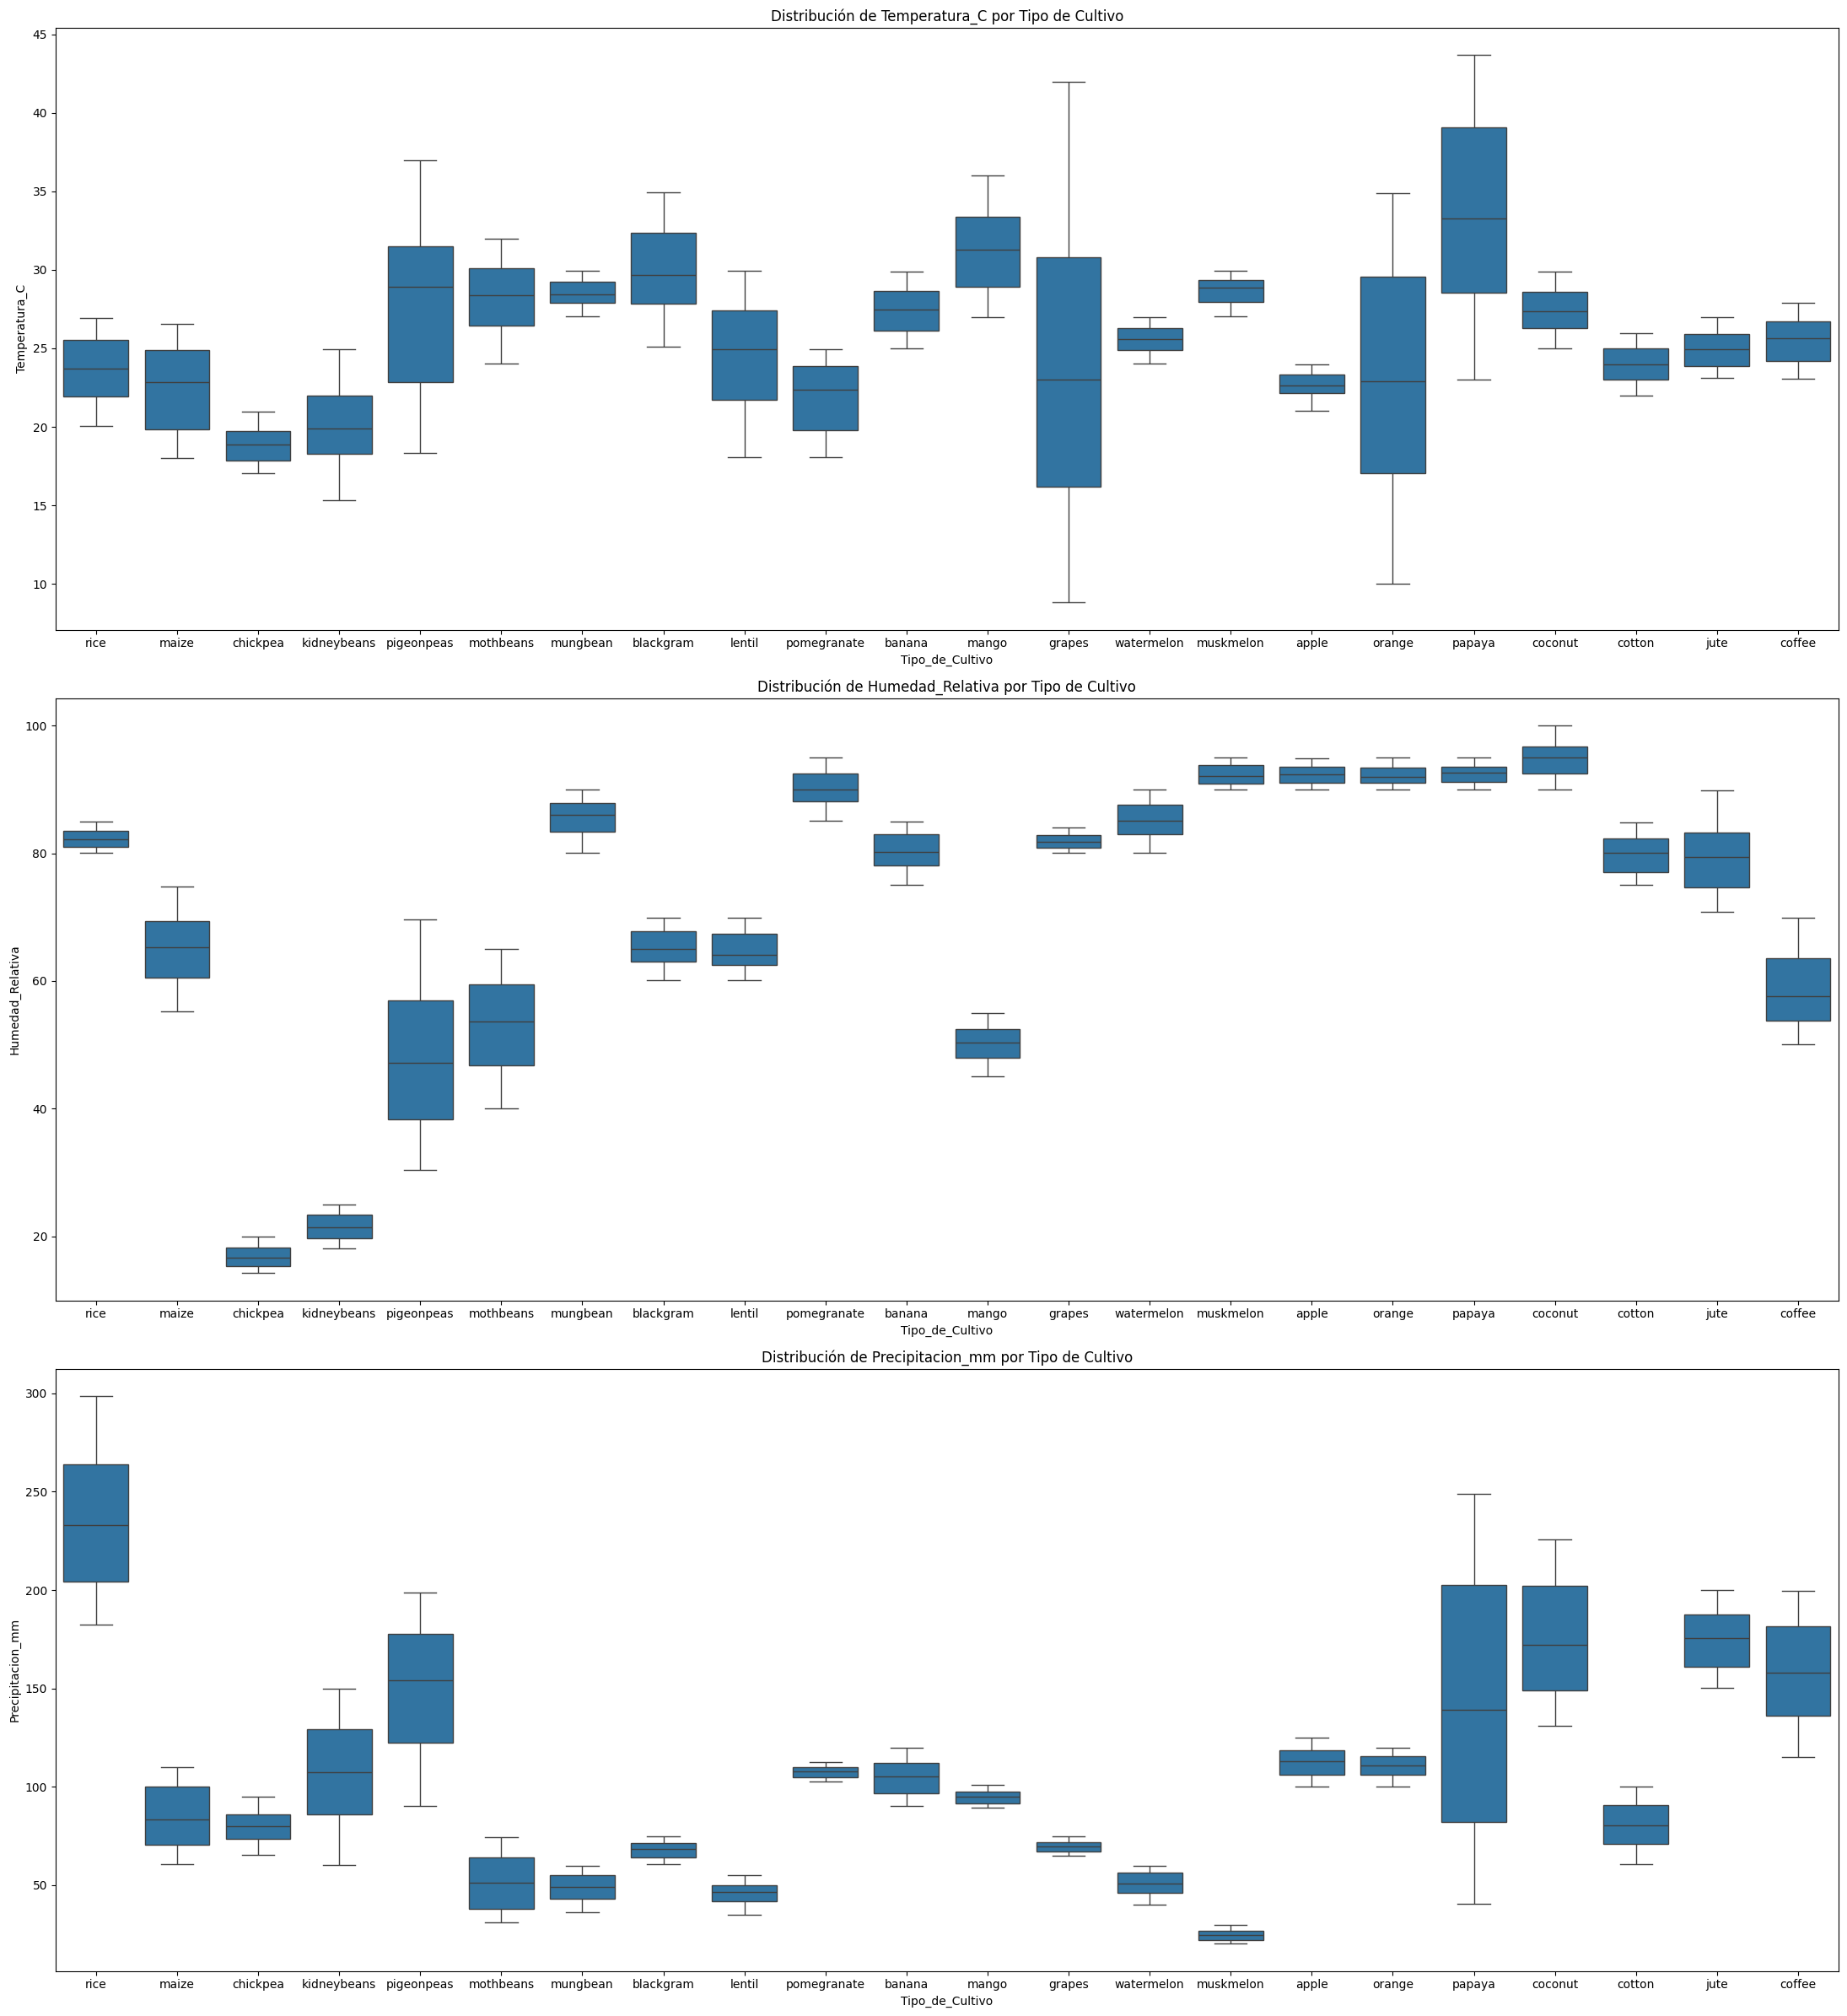

In [26]:
clima_variables = ['Temperatura_C', 'Humedad_Relativa', 'Precipitacion_mm']

plt.figure(figsize=(22, 24))
for i, variable in enumerate(clima_variables, 1):
    plt.subplot(3, 1, i)
    sns.boxplot(x='Tipo_de_Cultivo', y=variable, data=df_cultivos)
    plt.title(f'Distribución de {variable} por Tipo de Cultivo')

plt.tight_layout()
plt.show()


##### ***Variación por Temperatura_C***
- "papaya" es el tipo de cultivo que requiere de más temperatura. Esto es así porque la papaya es una planta tropical que requiere de temperaturas cálidas para su crecimiento y desarrollo. 

##### ***Variación por Humedad Relativa***
- "coconut" es el tipo de cultivo que requiere de más humedad relativa. Esto se debe a que el coco es una planta tropical que requiere de mucha humedad para su crecimiento y desarrollo. 

##### ***Variación por Precipitacion mm***
- "rice" es el tipo de cultivo que requiere de más precipitación. Esto se debe a que el arroz es una planta que requiere de mucha agua para su crecimiento y desarrollo. Además, el arroz es un cultivo que se desarrolla en zonas de clima tropical y subtropical, donde las precipitaciones son abundantes.

### ***Recomendación general***
Si se tuviese que realizar una recomendación de cultivo en base a las condiciones climáticas, se realizaría la siguiente recomendación:

- La Humedad relativa parece ser la variable climática que más influye en la recomendación de cultivo, ya que a partir de alrededor de 50% se dividen los tipos de cultivos en 2.

- La Precipitación es la segunda variable que más influye en la recomendación de cultivo, ya que el se puede ver claramente como "rice" es el cultivo que más precipitación requiere. Resalta sobre el resto.

- La Temperatura_C no es un buen indicador para el tipo de cultivo.

___

## ***b. Machine Learning***

### Encoding de variables categóricas

He utilizado LabelEncoder para cada tipo de cultivo ya que es una variable categórica. El resto de las variables son numéricas, por lo que no es necesario codificarlas.

In [27]:
from sklearn.preprocessing import LabelEncoder
df_cultivos_le = LabelEncoder()
df_cultivos_le.fit(df_cultivos['Tipo_de_Cultivo'])
df_cultivos_le.classes_

array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
       'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
       'pigeonpeas', 'pomegranate', 'rice', 'watermelon'], dtype=object)

### Regresión Logística

##### Variable dependiente: Tipo de Cultivo
##### Variables independientes: Contenido_de_Nitrogeno, Contenido_de_Fosforo, Contenido_de_Potasio, Temperatura_C, Humedad_Relativa, Nivel_de_pH, Precipitacion_mm

In [28]:
X = df_cultivos[['Contenido_de_Nitrogeno', 'Contenido_de_Fosforo', 'Contenido_de_Potasio', 'Temperatura_C', 'Humedad_Relativa', 'Nivel_de_pH', 'Precipitacion_mm']]
y = df_cultivos['Tipo_de_Cultivo']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train, 20% test. Esto lo hago para que el modelo no haga overfitting.

In [30]:
import statsmodels.api as sm
logit_model=sm.MNLogit(y_train,sm.add_constant(X_train))
logit_model
result=logit_model.fit(method='bfgs')
stats1=result.summary()
print(stats1)

         Current function value: 0.679007
         Iterations: 35
         Function evaluations: 44
         Gradient evaluations: 44
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has b

/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### Arbol de Decisiones

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

decision_tree_model = DecisionTreeClassifier(criterion="entropy", random_state=2, max_depth=5) 

decision_tree_model.fit(X_train, y_train)

score = cross_val_score(decision_tree_model, X, y, cv=5) 
print('Puntuación de validación cruzada:', score)

dt_train_accuracy = decision_tree_model.score(X_train, y_train) 
print("Precisión en entrenamiento =", dt_train_accuracy)

dt_test_accuracy = decision_tree_model.score(X_test, y_test)
print("Precisión en pruebas =", dt_test_accuracy)


Puntuación de validación cruzada: [0.93636364 0.90909091 0.91818182 0.87045455 0.93636364]
Precisión en entrenamiento = 0.8875
Precisión en pruebas = 0.865909090909091


### Matriz de Confusión

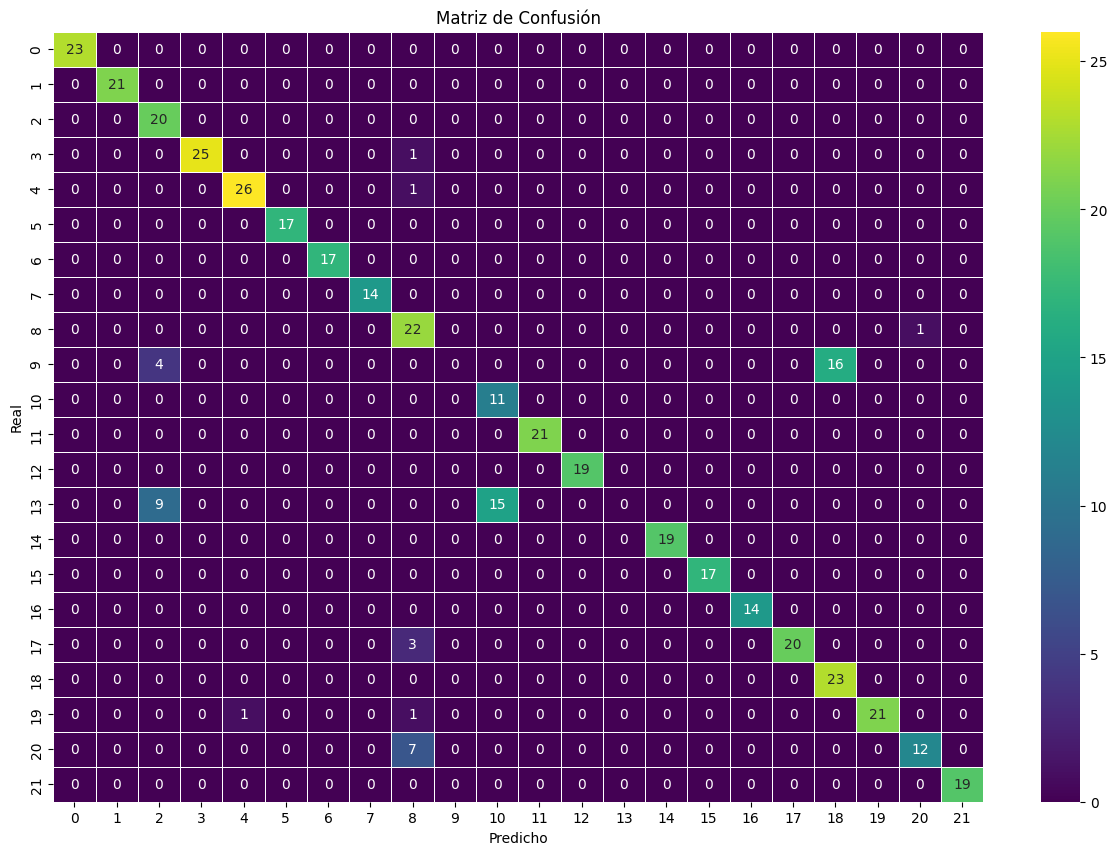

In [32]:
y_pred = decision_tree_model.predict(X_test)
y_true = y_test
cm_dt = confusion_matrix(y_true, y_pred)

f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(cm_dt, annot=True, linewidth=0.5, fmt=".0f", cmap='viridis', ax=ax)
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title('Matriz de Confusión')
plt.show()

In [33]:
df_cultivos_le.classes_

array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
       'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
       'pigeonpeas', 'pomegranate', 'rice', 'watermelon'], dtype=object)

In [34]:
clases = ['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
          'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
          'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
          'pigeonpeas', 'pomegranate', 'rice', 'watermelon']

posiciones = [clases.index(clase) for clase in df_cultivos_le.classes_]

for clase, posicion in zip(df_cultivos_le.classes_, posiciones):
    print(f'{clase}: {posicion}')


apple: 0
banana: 1
blackgram: 2
chickpea: 3
coconut: 4
coffee: 5
cotton: 6
grapes: 7
jute: 8
kidneybeans: 9
lentil: 10
maize: 11
mango: 12
mothbeans: 13
mungbean: 14
muskmelon: 15
orange: 16
papaya: 17
pigeonpeas: 18
pomegranate: 19
rice: 20
watermelon: 21


##### Explicación de la Matriz de Confusión

La matriz de confusión es una tabla que se utiliza a menudo para describir el rendimiento de un modelo de clasificación.

- La diagonal de la matriz de confusión representa las predicciones correctas del modelo. Es decir, los casos en los que el cultivo real y el cultivo predicho son el mismo.

- Los desvíos de la diagonal representan las predicciones incorrectas. Es decir, los casos en los que el cultivo real y el cultivo predicho no son el mismo.

Por último, para determinar qué cultivo se confunde más a menudo, hay que buscar la fila (o columna) con la mayor cantidad de valores fuera de la diagonal. En este caso particular, la fila con la mayor cantidad de valores fuera de la diagonal es la columna 18 ("pigeonpas"), fila 9 ("kidneybeans"). Entonces, esto quiere decir que la predicción dijo que eran "pigeonpeas", pero realmente eran "kidneybeans". Por lo tanto, el cultivo que se confunde más a menudo es "kidneybeans" (16 veces).

In [35]:
from sklearn.tree import export_graphviz
import graphviz

In [36]:
df_cultivos_le.classes_ 

array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
       'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
       'pigeonpeas', 'pomegranate', 'rice', 'watermelon'], dtype=object)

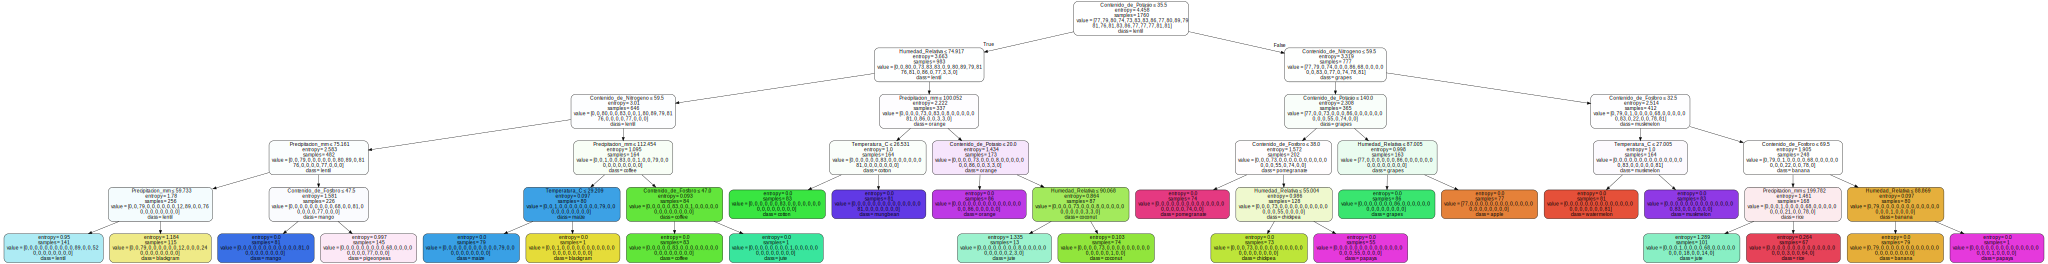

In [37]:
features = X.columns
targets = df_cultivos_le.classes_ # siempre dejo la variable encodeada en target
data = export_graphviz(decision_tree_model, out_file=None, feature_names=features, class_names=targets, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(data)
graph

In [38]:
graph.format = 'png'
graph.render(filename='tree_image', directory='./', cleanup=True)

'tree_image.png'